# Problem 1

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [198]:
housing = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [199]:
def compute_cost(X, y, theta): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represents an input characteristic 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * len(y)) * np.sum(sqrErrors) 

    return J

In [200]:
def gradient_descent(X, y, theta, alpha, iterations, X_val, y_val): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represents an input characteristic 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(m x 1) 
    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
    alpha : Learning rate. Scalar value typically <= 0.1
    iterations: No of iterations. Scalar value.  

    Output Parameters 
    ----------------- 
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
    cost_history: Conatins value of cost for each iteration. 1D array. Dimension (m x 1)
    val_history: Contains value of cose for each iteration compared to the validation set. Dimension (m x 1)
    """ 
    cost_history = np.zeros(iterations)
    val_history = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / len(y)) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        val_history[i] = compute_cost(X_val, y_val, theta)

    return theta, cost_history, val_history

### 1.a)

In [201]:
varlist_1a = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_1a = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'), columns = varlist_1a)
housing_1a.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [202]:
np.random.seed(0)
df_train_1a, df_test_1a = train_test_split(housing_1a, train_size = 0.8, test_size = 0.2)

Y_1a = df_train_1a.values[:, 0]
X_1a = df_train_1a.values[:, 1:6]
Y_val_1a = df_test_1a.values[:, 0]
X_val_1a = df_test_1a.values[:, 1:6]
V0_1a = np.ones((len(Y_1a), 1))
V0_val_1a = np.ones((len(Y_val_1a), 1))

M_1a = np.hstack((V0_1a, X_1a))
M_val_1a = np.hstack((V0_val_1a, X_val_1a))
theta_1a = np.zeros(M_1a.shape[1])

In [203]:
a_1a = 6e-8
b_1a = 1e-8
c_1a = 1e-10
d_1a = 1e-12
iterations_1a = 100000
a_theta_1a, a_cost_history_1a, a_val_history_1a = gradient_descent(M_1a, Y_1a, theta_1a, a_1a, iterations_1a, M_val_1a, Y_val_1a)
b_theta_1a, b_cost_history_1a, b_val_history_1a = gradient_descent(M_1a, Y_1a, theta_1a, b_1a, iterations_1a, M_val_1a, Y_val_1a)
c_theta_1a, c_cost_history_1a, c_val_history_1a = gradient_descent(M_1a, Y_1a, theta_1a, c_1a, iterations_1a, M_val_1a, Y_val_1a)
d_theta_1a, d_cost_history_1a, d_val_history_1a = gradient_descent(M_1a, Y_1a, theta_1a, d_1a, iterations_1a, M_val_1a, Y_val_1a)

1524896254588.952 1546314991230.5586 1550620560043.311 1542102281514.4353
[2034.29771715  853.37472502 7941.58265386 4478.18659348 6907.44138244
 1987.7319843 ]


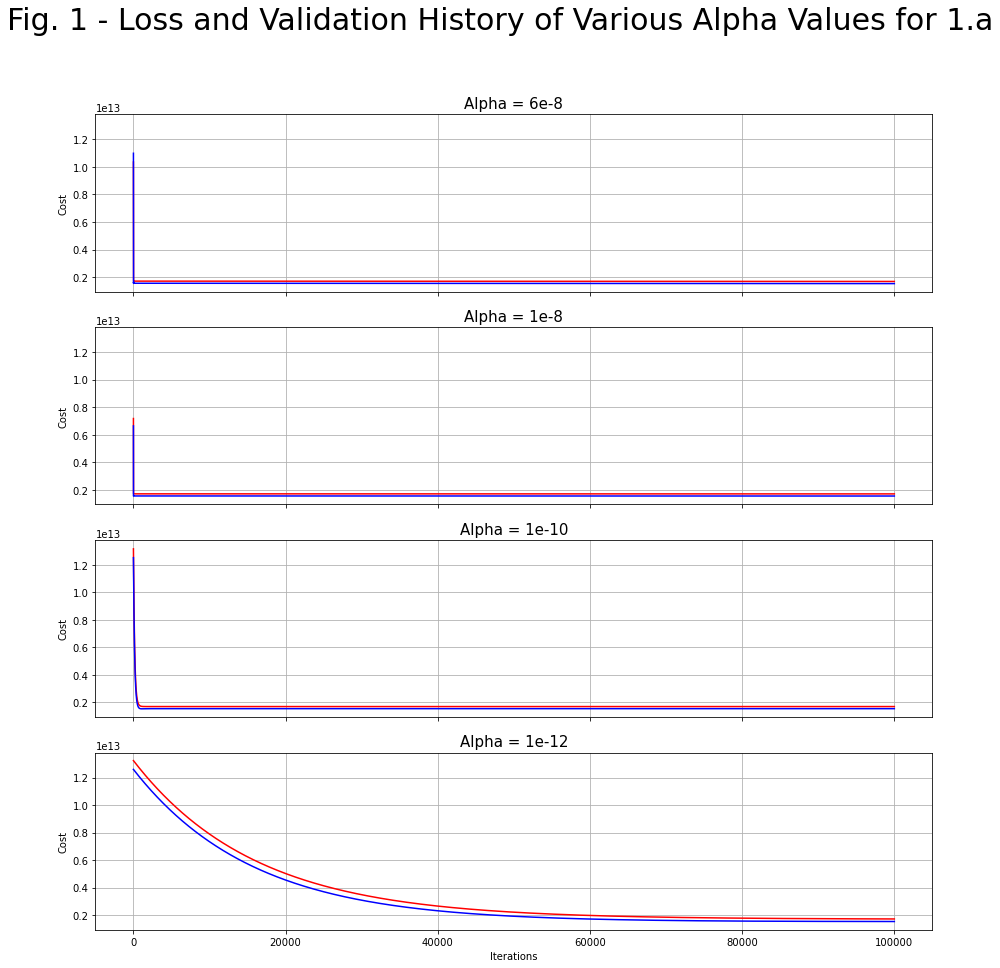

In [230]:
fig1, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig1.suptitle('Fig. 1 - Loss and Validation History of Various Alpha Values for 1.a', fontsize = 30)

axs[0].plot(range(1, iterations_1a + 1), a_cost_history_1a, color = 'red')
axs[0].plot(range(1, iterations_1a + 1), a_val_history_1a, color = 'blue')
axs[0].set_title('Alpha = 6e-8', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_1a + 1), b_cost_history_1a, color = 'red')
axs[1].plot(range(1, iterations_1a + 1), b_val_history_1a, color = 'blue')
axs[1].set_title('Alpha = 1e-8', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_1a + 1), c_cost_history_1a, color = 'red')
axs[2].plot(range(1, iterations_1a + 1), c_val_history_1a, color = 'blue')
axs[2].set_title('Alpha = 1e-10', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_1a + 1), d_cost_history_1a, color = 'red')
axs[3].plot(range(1, iterations_1a + 1), d_val_history_1a, color = 'blue')
axs[3].set_title('Alpha = 1e-12', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_1a[-1], b_val_history_1a[-1], c_val_history_1a[-1], d_val_history_1a[-1])
print(a_theta_1a)

### 1.b)

In [205]:
housing_1b = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'))
housing_1b.pop("furnishingstatus")
housing_1b = housing_1b.replace(to_replace = ['yes', 'no'], value = [1, 0])
housing_1b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [233]:
np.random.seed(0)
df_train_1b, df_test_1b = train_test_split(housing_1b, train_size = 0.8, test_size = 0.2)

Y_1b = df_train_1b.values[:, 0]
X_1b = df_train_1b.values[:, 1:12]
Y_val_1b = df_test_1b.values[:, 0]
X_val_1b = df_test_1b.values[:, 1:12]
V0_1b = np.ones((len(Y_1b), 1))
V0_val_1b = np.ones((len(Y_val_1b), 1))

M_1b = np.hstack((V0_1b, X_1b))
M_val_1b = np.hstack((V0_val_1b, X_val_1b))
theta_1b = np.zeros(M_1b.shape[1])

In [207]:
a_1b = 1e-8
b_1b = 1e-9
c_1b = 1e-10
d_1b = 1e-11
iterations_1b = 6000
a_theta_1b, a_cost_history_1b, a_val_history_1b = gradient_descent(M_1b, Y_1b, theta_1b, a_1b, iterations_1b, M_val_1b, Y_val_1b)
b_theta_1b, b_cost_history_1b, b_val_history_1b = gradient_descent(M_1b, Y_1b, theta_1b, b_1b, iterations_1b, M_val_1b, Y_val_1b)
c_theta_1b, c_cost_history_1b, c_val_history_1b = gradient_descent(M_1b, Y_1b, theta_1b, c_1b, iterations_1b, M_val_1b, Y_val_1b)
d_theta_1b, d_cost_history_1b, d_val_history_1b = gradient_descent(M_1b, Y_1b, theta_1b, d_1b, iterations_1b, M_val_1b, Y_val_1b)

1550384159953.9846 1550636086235.6934 1550661277231.1438 1721156282676.7688
[ 20.65551674 860.9545051   80.49717546  45.23825994  69.84655729
  18.74096743   9.63213576  15.74525679   4.21977621  18.46899341
  20.0645966    9.76197079]


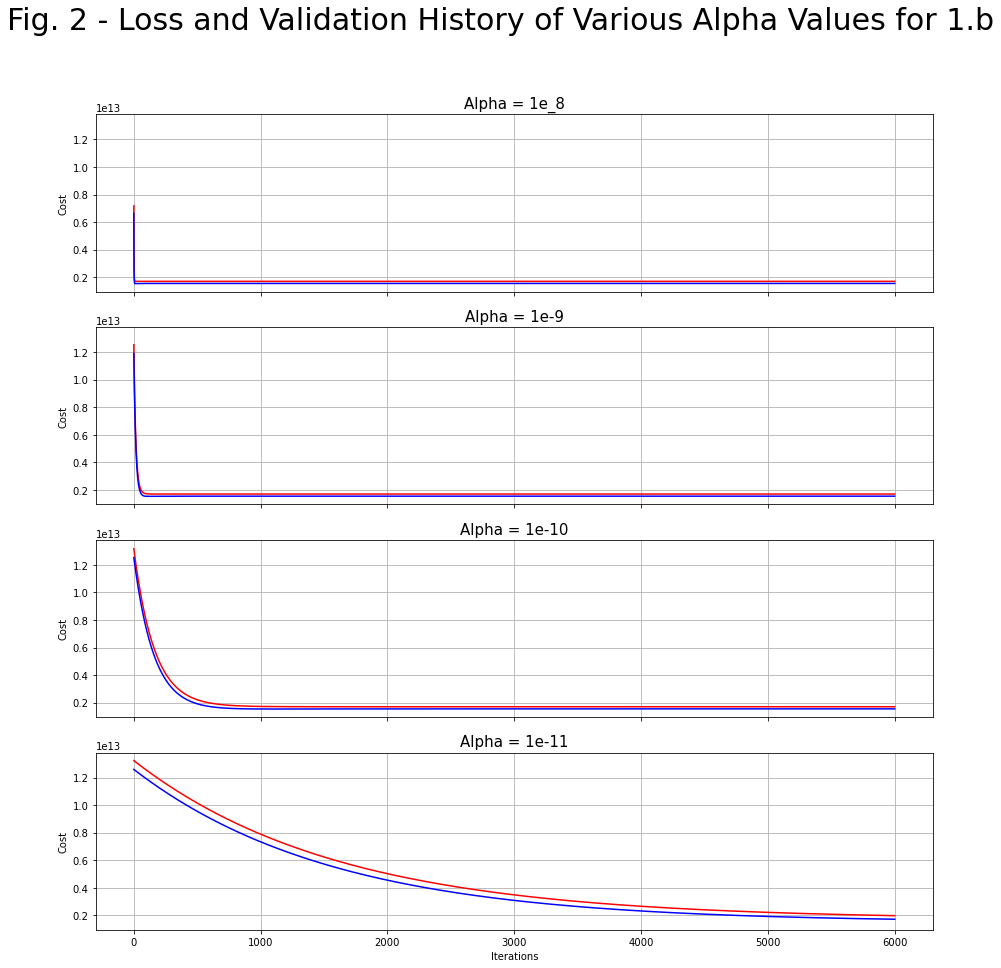

In [232]:
fig2, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig2.suptitle('Fig. 2 - Loss and Validation History of Various Alpha Values for 1.b', fontsize = 30)

axs[0].plot(range(1, iterations + 1), a_cost_history_1b, color = 'red')
axs[0].plot(range(1, iterations + 1), a_val_history_1b, color = 'blue')
axs[0].set_title('Alpha = 1e_8', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations + 1), b_cost_history_1b, color = 'red')
axs[1].plot(range(1, iterations + 1), b_val_history_1b, color = 'blue')
axs[1].set_title('Alpha = 1e-9', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations + 1), c_cost_history_1b, color = 'red')
axs[2].plot(range(1, iterations + 1), c_val_history_1b, color = 'blue')
axs[2].set_title('Alpha = 1e-10', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations + 1), d_cost_history_1b, color = 'red')
axs[3].plot(range(1, iterations + 1), d_val_history_1b, color = 'blue')
axs[3].set_title('Alpha = 1e-11', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_1b[-1], b_val_history_1b[-1], c_val_history_1b[-1], d_val_history_1b[-1])
print(a_theta_1b)

# Problem 2

### 2.a)

In [209]:
varlist_2a = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_2a = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'), columns = varlist_2a)

housing_2a_st = StandardScaler().fit_transform(housing_2a)
housing_2a_mm = MinMaxScaler().fit_transform(housing_2a)

In [210]:
np.random.seed(0)
df_train_2a_st, df_test_2a_st = train_test_split(housing_2a_st, train_size = 0.8, test_size = 0.2)
df_train_2a_mm, df_test_2a_mm = train_test_split(housing_2a_mm, train_size = 0.8, test_size = 0.2)

# Forming the input and output for the standardized set
Y_2a_st = df_train_2a_st[:, 0]
X_2a_st = df_train_2a_st[:, 1:6]
Y_val_2a_st = df_test_2a_st[:, 0]
X_val_2a_st = df_test_2a_st[:, 1:6]
V0_2a_st = np.ones((len(Y_2a_st), 1))
V0_val_2a_st = np.ones((len(Y_val_2a_st), 1))

M_2a_st = np.hstack((V0_2a_st, X_2a_st))
M_val_2a_st = np.hstack((V0_val_2a_st, X_val_2a_st))
theta_2a_st = np.zeros(M_2a_st.shape[1])

# Forming the input and output for the normalized set
Y_2a_mm = df_train_2a_mm[:, 0]
X_2a_mm = df_train_2a_mm[:, 1:6]
Y_val_2a_mm = df_test_2a_mm[:, 0]
X_val_2a_mm = df_test_2a_mm[:, 1:6]
V0_2a_mm = np.ones((len(Y_2a_mm), 1))
V0_val_2a_mm = np.ones((len(Y_val_2a_mm), 1))

M_2a_mm = np.hstack((V0_2a_mm, X_2a_mm))
M_val_2a_mm = np.hstack((V0_val_2a_mm, X_val_2a_mm))
theta_2a_mm = np.zeros(M_2a_mm.shape[1])

In [211]:
a_2a = 1e-2
b_2a = 5e-3
c_2a = 1e-3
d_2a = 5e-4
iterations_2a = 5000
a_theta_2a_st, a_cost_history_2a_st, a_val_history_2a_st = gradient_descent(M_2a_st, Y_2a_st, theta_2a_st, a_2a, iterations_2a, M_val_2a_st, Y_val_2a_st)
b_theta_2a_st, b_cost_history_2a_st, b_val_history_2a_st = gradient_descent(M_2a_st, Y_2a_st, theta_2a_st, b_2a, iterations_2a, M_val_2a_st, Y_val_2a_st)
c_theta_2a_st, c_cost_history_2a_st, c_val_history_2a_st = gradient_descent(M_2a_st, Y_2a_st, theta_2a_st, c_2a, iterations_2a, M_val_2a_st, Y_val_2a_st)
d_theta_2a_st, d_cost_history_2a_st, d_val_history_2a_st = gradient_descent(M_2a_st, Y_2a_st, theta_2a_st, d_2a, iterations_2a, M_val_2a_st, Y_val_2a_st)

a_theta_2a_mm, a_cost_history_2a_mm, a_val_history_2a_mm = gradient_descent(M_2a_mm, Y_2a_mm, theta_2a_mm, a_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm)
b_theta_2a_mm, b_cost_history_2a_mm, b_val_history_2a_mm = gradient_descent(M_2a_mm, Y_2a_mm, theta_2a_mm, b_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm)
c_theta_2a_mm, c_cost_history_2a_mm, c_val_history_2a_mm = gradient_descent(M_2a_mm, Y_2a_mm, theta_2a_mm, c_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm)
d_theta_2a_mm, d_cost_history_2a_mm, d_val_history_2a_mm = gradient_descent(M_2a_mm, Y_2a_mm, theta_2a_mm, d_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm)

0.1680624775881945 0.16806248174172633 0.16803683502664785 0.16771602299673644


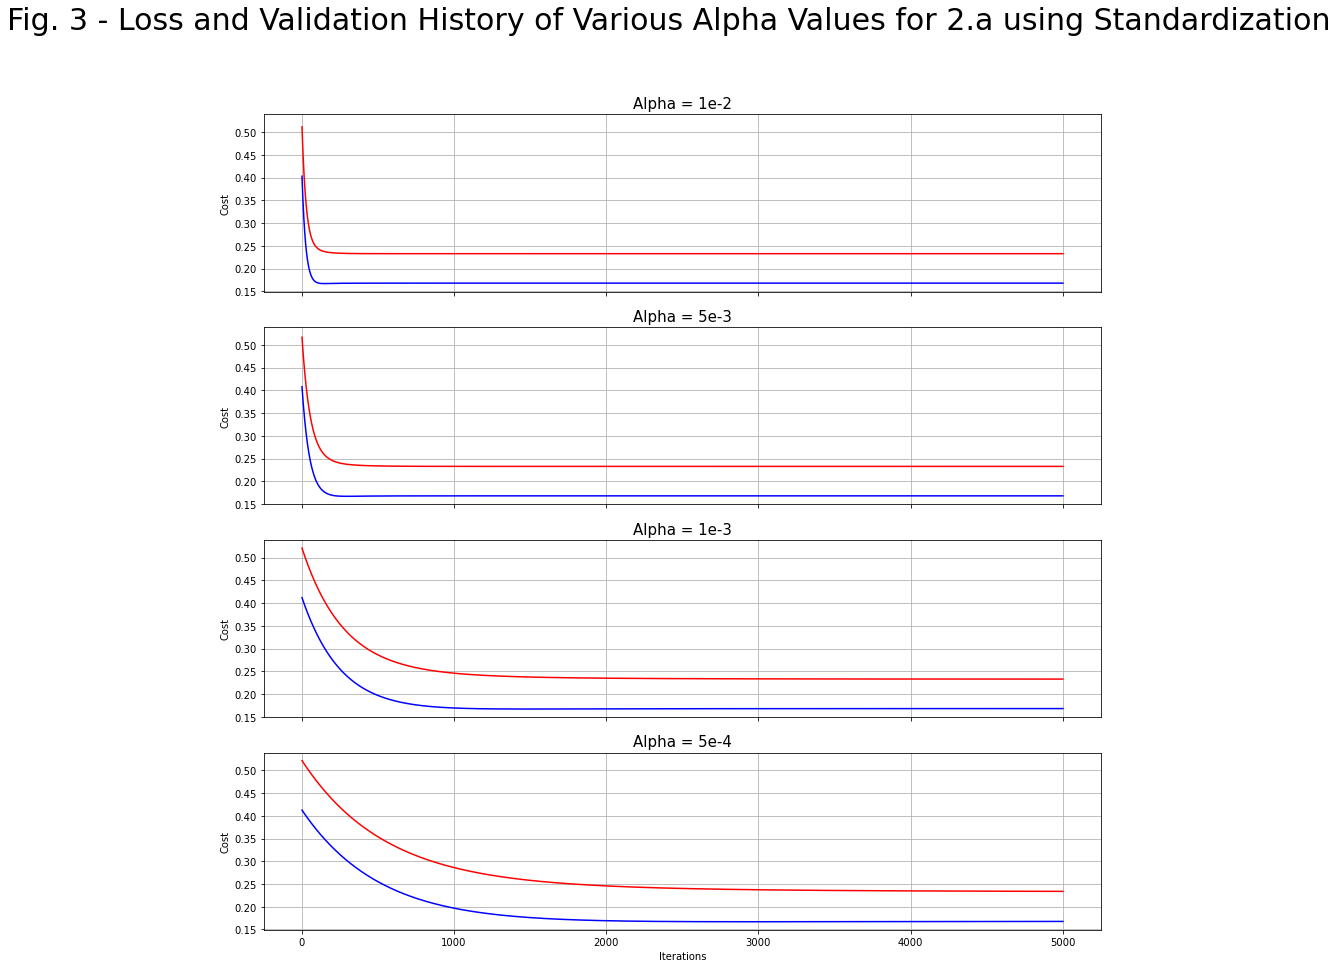

In [212]:
fig3, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig3.suptitle('Fig. 3 - Loss and Validation History of Various Alpha Values for 2.a using Standardization', fontsize = 30)

axs[0].plot(range(1, iterations_2a + 1), a_cost_history_2a_st, color = 'red')
axs[0].plot(range(1, iterations_2a + 1), a_val_history_2a_st, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_2a + 1), b_cost_history_2a_st, color = 'red')
axs[1].plot(range(1, iterations_2a + 1), b_val_history_2a_st, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_2a + 1), c_cost_history_2a_st, color = 'red')
axs[2].plot(range(1, iterations_2a + 1), c_val_history_2a_st, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_2a + 1), d_cost_history_2a_st, color = 'red')
axs[3].plot(range(1, iterations_2a + 1), d_val_history_2a_st, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_2a_st[-1], b_val_history_2a_st[-1], c_val_history_2a_st[-1], d_val_history_2a_st[-1])

0.005865631539380882 0.006267272265080109 0.008128407818692864 0.008750835073305697


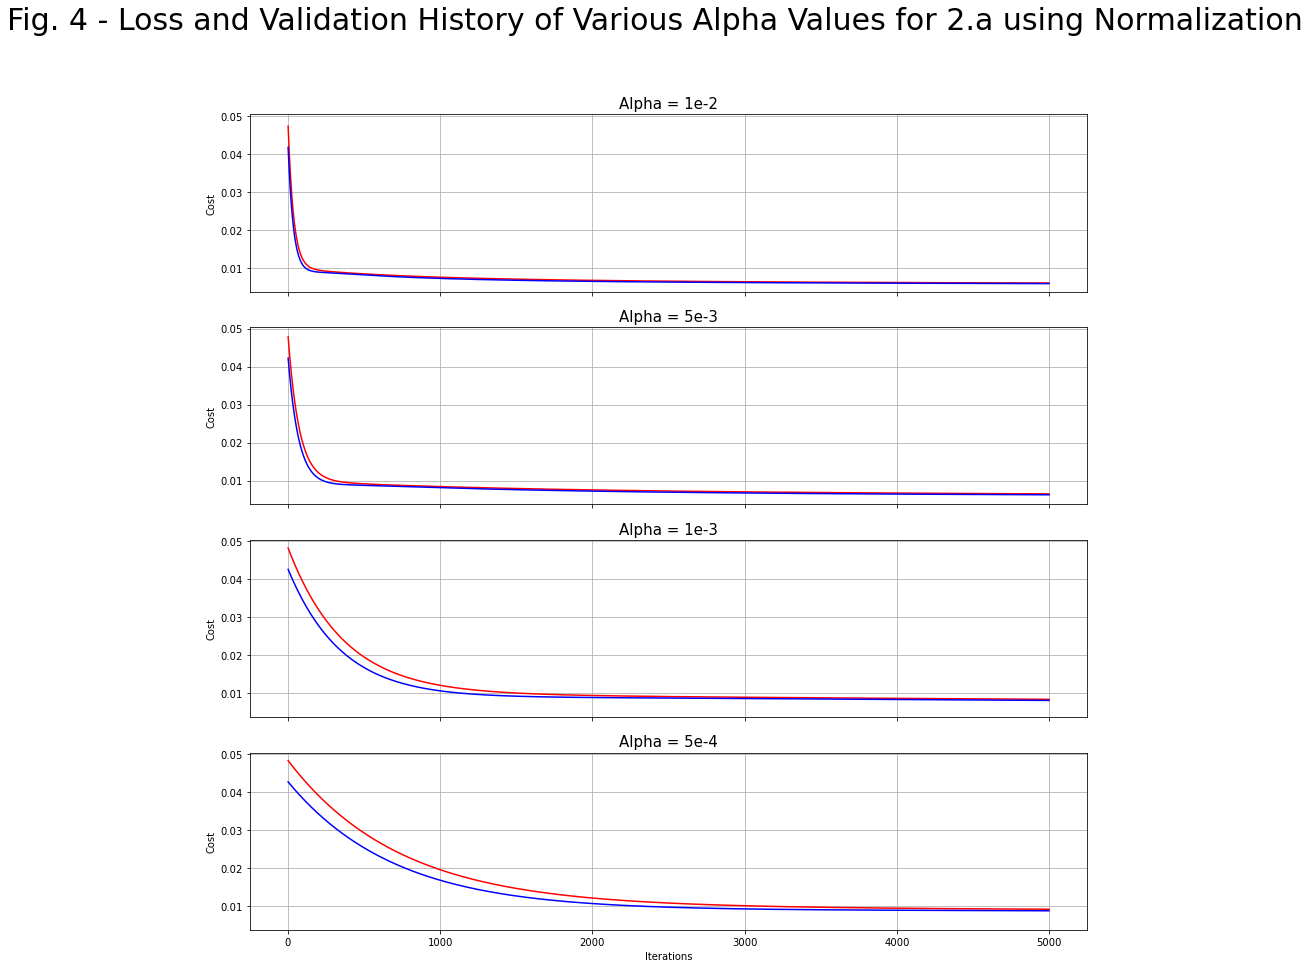

In [213]:
fig4, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig4.suptitle('Fig. 4 - Loss and Validation History of Various Alpha Values for 2.a using Normalization', fontsize = 30)

axs[0].plot(range(1, iterations_2a + 1), a_cost_history_2a_mm, color = 'red')
axs[0].plot(range(1, iterations_2a + 1), a_val_history_2a_mm, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_2a + 1), b_cost_history_2a_mm, color = 'red')
axs[1].plot(range(1, iterations_2a + 1), b_val_history_2a_mm, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_2a + 1), c_cost_history_2a_mm, color = 'red')
axs[2].plot(range(1, iterations_2a + 1), c_val_history_2a_mm, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_2a + 1), d_cost_history_2a_mm, color = 'red')
axs[3].plot(range(1, iterations_2a + 1), d_val_history_2a_mm, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_2a_mm[-1], b_val_history_2a_mm[-1], c_val_history_2a_mm[-1], d_val_history_2a_mm[-1])

### 2.b)

In [214]:
housing_2b = pd.DataFrame(pd.read_csv(r'C:\Users\ccm51\Documents\ECGR_4105\Housing.csv'))
housing_2b.pop("furnishingstatus")
housing_2b = housing_2b.replace(to_replace = ['yes', 'no'], value = [1, 0])

housing_2b_st = StandardScaler().fit_transform(housing_2b)
housing_2b_mm = MinMaxScaler().fit_transform(housing_2b)

In [215]:
np.random.seed(0)
df_train_2b_st, df_test_2b_st = train_test_split(housing_2b_st, train_size = 0.8, test_size = 0.2)
df_train_2b_mm, df_test_2b_mm = train_test_split(housing_2b_mm, train_size = 0.8, test_size = 0.2)

# Forming the input and output for the standardized set
Y_2b_st = df_train_2b_st[:, 0]
X_2b_st = df_train_2b_st[:, 1:12]
Y_val_2b_st = df_test_2b_st[:, 0]
X_val_2b_st = df_test_2b_st[:, 1:12]
V0_2b_st = np.ones((len(Y_2b_st), 1))
V0_val_2b_st = np.ones((len(Y_val_2b_st), 1))

M_2b_st = np.hstack((V0_2b_st, X_2b_st))
M_val_2b_st = np.hstack((V0_val_2b_st, X_val_2b_st))
theta_2b_st = np.zeros(M_2b_st.shape[1])

# Forming the input and output for the normalized set
Y_2b_mm = df_train_2b_mm[:, 0]
X_2b_mm = df_train_2b_mm[:, 1:12]
Y_val_2b_mm = df_test_2b_mm[:, 0]
X_val_2b_mm = df_test_2b_mm[:, 1:12]
V0_2b_mm = np.ones((len(Y_2b_mm), 1))
V0_val_2b_mm = np.ones((len(Y_val_2b_mm), 1))

M_2b_mm = np.hstack((V0_2b_mm, X_2b_mm))
M_val_2b_mm = np.hstack((V0_val_2b_mm, X_val_2b_mm))
theta_2b_mm = np.zeros(M_2b_mm.shape[1])

In [216]:
a_2b = 1e-2
b_2b = 5e-3
c_2b = 1e-3
d_2b = 5e-4
iterations_2b = 5000
a_theta_2b_st, a_cost_history_2b_st, a_val_history_2b_st = gradient_descent(M_2b_st, Y_2b_st, theta_2b_st, a_2b, iterations_2b, M_val_2b_st, Y_val_2b_st)
b_theta_2b_st, b_cost_history_2b_st, b_val_history_2b_st = gradient_descent(M_2b_st, Y_2b_st, theta_2b_st, b_2b, iterations_2b, M_val_2b_st, Y_val_2b_st)
c_theta_2b_st, c_cost_history_2b_st, c_val_history_2b_st = gradient_descent(M_2b_st, Y_2b_st, theta_2b_st, c_2b, iterations_2b, M_val_2b_st, Y_val_2b_st)
d_theta_2b_st, d_cost_history_2b_st, d_val_history_2b_st = gradient_descent(M_2b_st, Y_2b_st, theta_2b_st, d_2b, iterations_2b, M_val_2b_st, Y_val_2b_st)

a_theta_2b_mm, a_cost_history_2b_mm, a_val_history_2b_mm = gradient_descent(M_2b_mm, Y_2b_mm, theta_2b_mm, a_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm)
b_theta_2b_mm, b_cost_history_2b_mm, b_val_history_2b_mm = gradient_descent(M_2b_mm, Y_2b_mm, theta_2b_mm, b_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm)
c_theta_2b_mm, c_cost_history_2b_mm, c_val_history_2b_mm = gradient_descent(M_2b_mm, Y_2b_mm, theta_2b_mm, c_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm)
d_theta_2b_mm, d_cost_history_2b_mm, d_val_history_2b_mm = gradient_descent(M_2b_mm, Y_2b_mm, theta_2b_mm, d_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm)

0.13862547779864023 0.13862558614380519 0.1378473456916903 0.13504938103636066


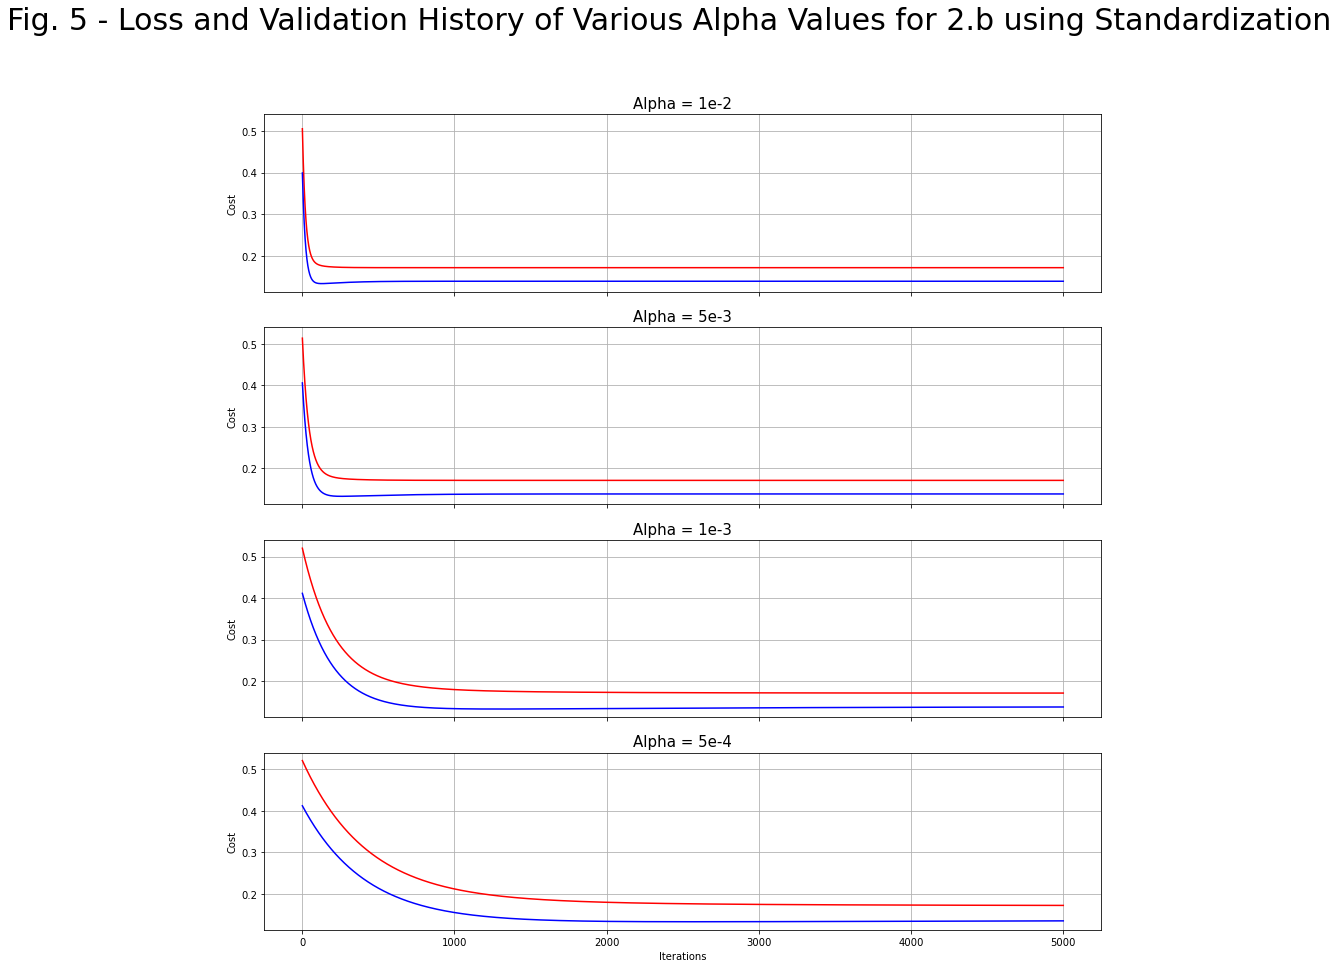

In [217]:
fig5, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig5.suptitle('Fig. 5 - Loss and Validation History of Various Alpha Values for 2.b using Standardization', fontsize = 30)

axs[0].plot(range(1, iterations_2b + 1), a_cost_history_2b_st, color = 'red')
axs[0].plot(range(1, iterations_2b + 1), a_val_history_2b_st, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_2b + 1), b_cost_history_2b_st, color = 'red')
axs[1].plot(range(1, iterations_2b + 1), b_val_history_2b_st, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_2b + 1), c_cost_history_2b_st, color = 'red')
axs[2].plot(range(1, iterations_2b + 1), c_val_history_2b_st, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_2b + 1), d_cost_history_2b_st, color = 'red')
axs[3].plot(range(1, iterations_2b + 1), d_val_history_2b_st, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_2b_st[-1], b_val_history_2b_st[-1], c_val_history_2b_st[-1], d_val_history_2b_st[-1])

0.004966181935851311 0.005223010371778919 0.006555012482010456 0.007230386729450547


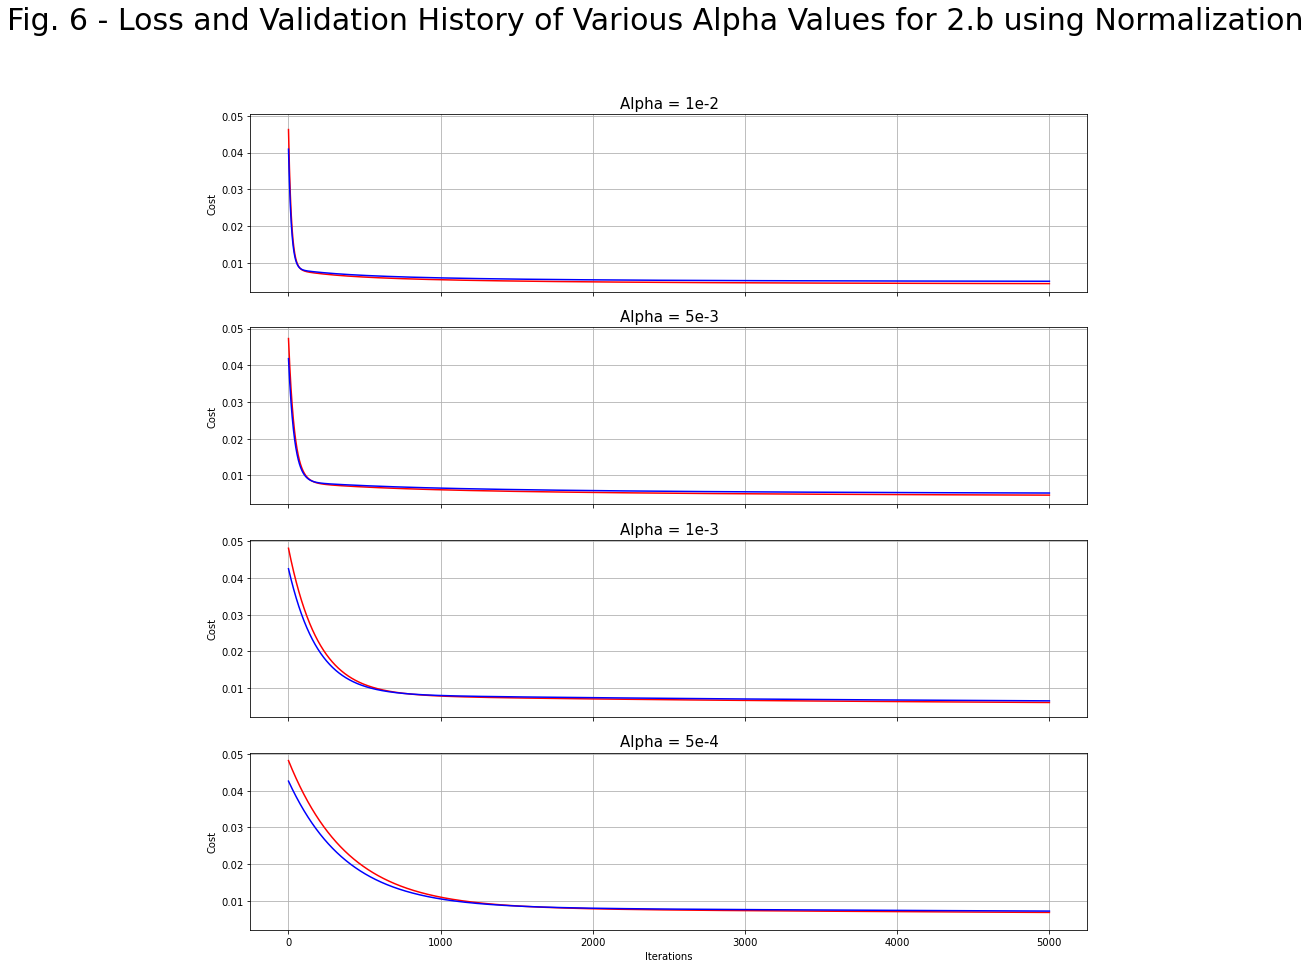

In [218]:
fig6, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig6.suptitle('Fig. 6 - Loss and Validation History of Various Alpha Values for 2.b using Normalization', fontsize = 30)

axs[0].plot(range(1, iterations_2b + 1), a_cost_history_2b_mm, color = 'red')
axs[0].plot(range(1, iterations_2b + 1), a_val_history_2b_mm, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_2b + 1), b_cost_history_2b_mm, color = 'red')
axs[1].plot(range(1, iterations_2b + 1), b_val_history_2b_mm, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_2b + 1), c_cost_history_2b_mm, color = 'red')
axs[2].plot(range(1, iterations_2b + 1), c_val_history_2b_mm, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_2b + 1), d_cost_history_2b_mm, color = 'red')
axs[3].plot(range(1, iterations_2b + 1), d_val_history_2b_mm, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_2b_mm[-1], b_val_history_2b_mm[-1], c_val_history_2b_mm[-1], d_val_history_2b_mm[-1])

# Problem 3

### 3.a)

In [219]:
def gradient_descent_penal(X, y, theta, alpha, iterations, X_val, y_val, lmbda): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represents an input characteristic 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(m x 1) 
    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
    alpha : Learning rate. Scalar value typically <= 0.1
    iterations: No of iterations. Scalar value.  

    Output Parameters 
    ----------------- 
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
    cost_history: Conatins value of cost for each iteration. 1D array. Dimension (m x 1)
    val_history: Contains value of cose for each iteration compared to the validation set. Dimension (m x 1)
    """ 
    cost_history = np.zeros(iterations)
    val_history = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / len(y)) * X.transpose().dot(errors);
        theta = theta * (1 - alpha * lmbda / len(y)) - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        val_history[i] = compute_cost(X_val, y_val, theta)

    return theta, cost_history, val_history

In [220]:
a_3a = 1e-2
b_3a = 5e-3
c_3a = 1e-3
d_3a = 5e-4
iterations_3a = 5000
para_penal_3a = 0.1
a_theta_3a_st, a_cost_history_3a_st, a_val_history_3a_st = gradient_descent_penal(M_2a_st, Y_2a_st, theta_2a_st, a_2a, iterations_2a, M_val_2a_st, Y_val_2a_st, para_penal)
b_theta_3a_st, b_cost_history_3a_st, b_val_history_3a_st = gradient_descent_penal(M_2a_st, Y_2a_st, theta_2a_st, b_2a, iterations_2a, M_val_2a_st, Y_val_2a_st, para_penal)
c_theta_3a_st, c_cost_history_3a_st, c_val_history_3a_st = gradient_descent_penal(M_2a_st, Y_2a_st, theta_2a_st, c_2a, iterations_2a, M_val_2a_st, Y_val_2a_st, para_penal)
d_theta_3a_st, d_cost_history_3a_st, d_val_history_3a_st = gradient_descent_penal(M_2a_st, Y_2a_st, theta_2a_st, d_2a, iterations_2a, M_val_2a_st, Y_val_2a_st, para_penal)

a_theta_3a_mm, a_cost_history_3a_mm, a_val_history_3a_mm = gradient_descent_penal(M_2a_mm, Y_2a_mm, theta_2a_mm, a_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm, para_penal)
b_theta_3a_mm, b_cost_history_3a_mm, b_val_history_3a_mm = gradient_descent_penal(M_2a_mm, Y_2a_mm, theta_2a_mm, b_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm, para_penal)
c_theta_3a_mm, c_cost_history_3a_mm, c_val_history_3a_mm = gradient_descent_penal(M_2a_mm, Y_2a_mm, theta_2a_mm, c_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm, para_penal)
d_theta_3a_mm, d_cost_history_3a_mm, d_val_history_3a_mm = gradient_descent_penal(M_2a_mm, Y_2a_mm, theta_2a_mm, d_2a, iterations_2a, M_val_2a_mm, Y_val_2a_mm, para_penal)

0.16805036053311279 0.16805036466690454 0.16802564870179795 0.16770837447499634


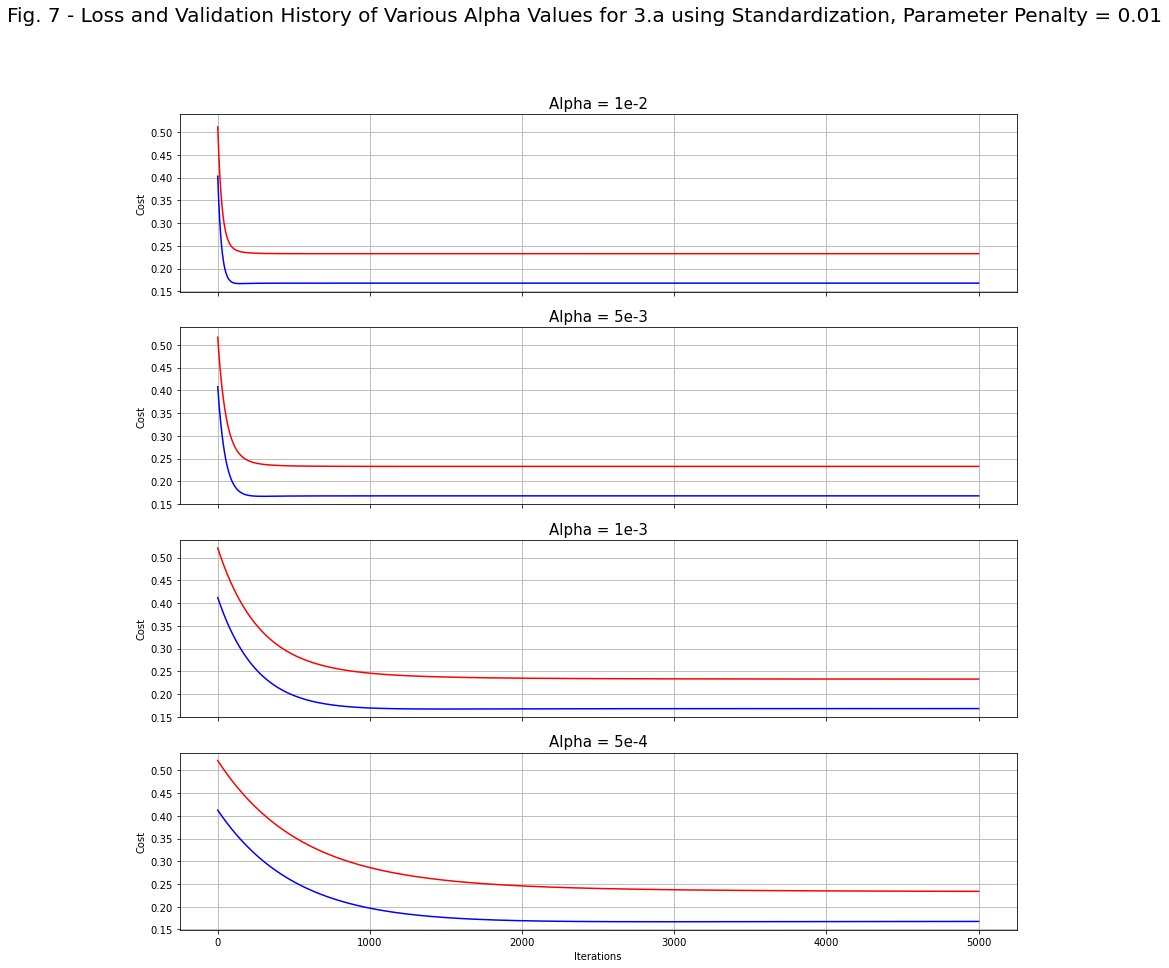

In [221]:
fig7, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig7.suptitle('Fig. 7 - Loss and Validation History of Various Alpha Values for 3.a using Standardization, Parameter Penalty = 0.01', fontsize = 20)

axs[0].plot(range(1, iterations_3a + 1), a_cost_history_3a_st, color = 'red')
axs[0].plot(range(1, iterations_3a + 1), a_val_history_3a_st, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_3a + 1), b_cost_history_3a_st, color = 'red')
axs[1].plot(range(1, iterations_3a + 1), b_val_history_3a_st, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_3a + 1), c_cost_history_3a_st, color = 'red')
axs[2].plot(range(1, iterations_3a + 1), c_val_history_3a_st, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_3a + 1), d_cost_history_3a_st, color = 'red')
axs[3].plot(range(1, iterations_3a + 1), d_val_history_3a_st, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_3a_st[-1], b_val_history_3a_st[-1], c_val_history_3a_st[-1], d_val_history_3a_st[-1])

0.005867502017506483 0.006269465406774853 0.008128468043226578 0.008750777960001357


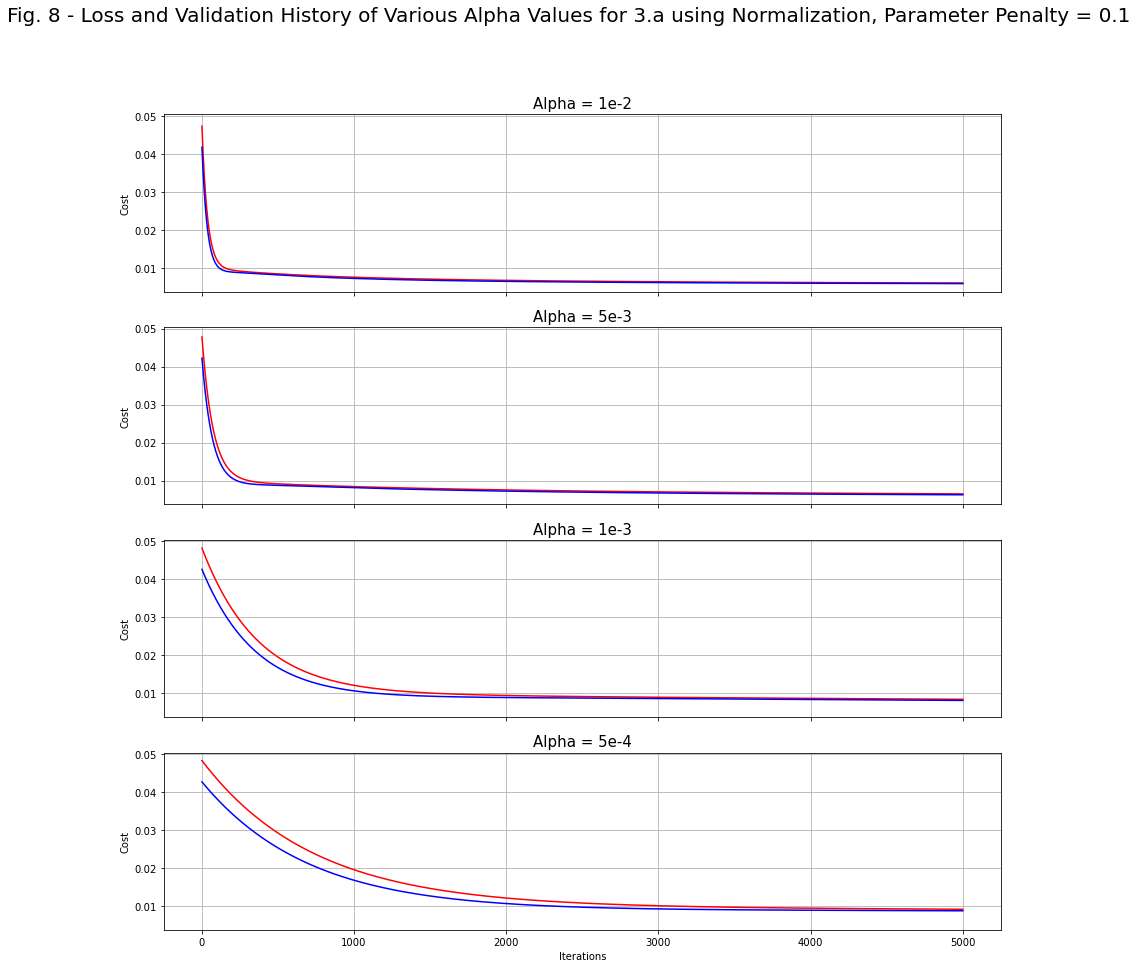

In [222]:
fig8, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig8.suptitle('Fig. 8 - Loss and Validation History of Various Alpha Values for 3.a using Normalization, Parameter Penalty = 0.1', fontsize = 20)

axs[0].plot(range(1, iterations_3a + 1), a_cost_history_3a_mm, color = 'red')
axs[0].plot(range(1, iterations_3a + 1), a_val_history_3a_mm, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_3a + 1), b_cost_history_3a_mm, color = 'red')
axs[1].plot(range(1, iterations_3a + 1), b_val_history_3a_mm, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_3a + 1), c_cost_history_3a_mm, color = 'red')
axs[2].plot(range(1, iterations_3a + 1), c_val_history_3a_mm, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_3a + 1), d_cost_history_3a_mm, color = 'red')
axs[3].plot(range(1, iterations_3a + 1), d_val_history_3a_mm, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_3a_mm[-1], b_val_history_3a_mm[-1], c_val_history_3a_mm[-1], d_val_history_3a_mm[-1])

In [223]:
a_3b = 1e-2
b_3b = 5e-3
c_3b = 1e-3
d_3b = 5e-4
iterations_3b = 5000
para_penal_3b = 0.1
a_theta_3b_st, a_cost_history_3b_st, a_val_history_3b_st = gradient_descent_penal(M_2b_st, Y_2b_st, theta_2b_st, a_2b, iterations_2b, M_val_2b_st, Y_val_2b_st, para_penal_3b)
b_theta_3b_st, b_cost_history_3b_st, b_val_history_3b_st = gradient_descent_penal(M_2b_st, Y_2b_st, theta_2b_st, b_2b, iterations_2b, M_val_2b_st, Y_val_2b_st, para_penal_3b)
c_theta_3b_st, c_cost_history_3b_st, c_val_history_3b_st = gradient_descent_penal(M_2b_st, Y_2b_st, theta_2b_st, c_2b, iterations_2b, M_val_2b_st, Y_val_2b_st, para_penal_3b)
d_theta_3b_st, d_cost_history_3b_st, d_val_history_3b_st = gradient_descent_penal(M_2b_st, Y_2b_st, theta_2b_st, d_2b, iterations_2b, M_val_2b_st, Y_val_2b_st, para_penal_3b)

a_theta_3b_mm, a_cost_history_3b_mm, a_val_history_3b_mm = gradient_descent_penal(M_2b_mm, Y_2b_mm, theta_2b_mm, a_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm, para_penal_3b)
b_theta_3b_mm, b_cost_history_3b_mm, b_val_history_3b_mm = gradient_descent_penal(M_2b_mm, Y_2b_mm, theta_2b_mm, b_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm, para_penal_3b)
c_theta_3b_mm, c_cost_history_3b_mm, c_val_history_3b_mm = gradient_descent_penal(M_2b_mm, Y_2b_mm, theta_2b_mm, c_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm, para_penal_3b)
d_theta_3b_mm, d_cost_history_3b_mm, d_val_history_3b_mm = gradient_descent_penal(M_2b_mm, Y_2b_mm, theta_2b_mm, d_2b, iterations_2b, M_val_2b_mm, Y_val_2b_mm, para_penal_3b)

0.13861259143381435 0.13861269919169053 0.13783663199563312 0.1350436476186018


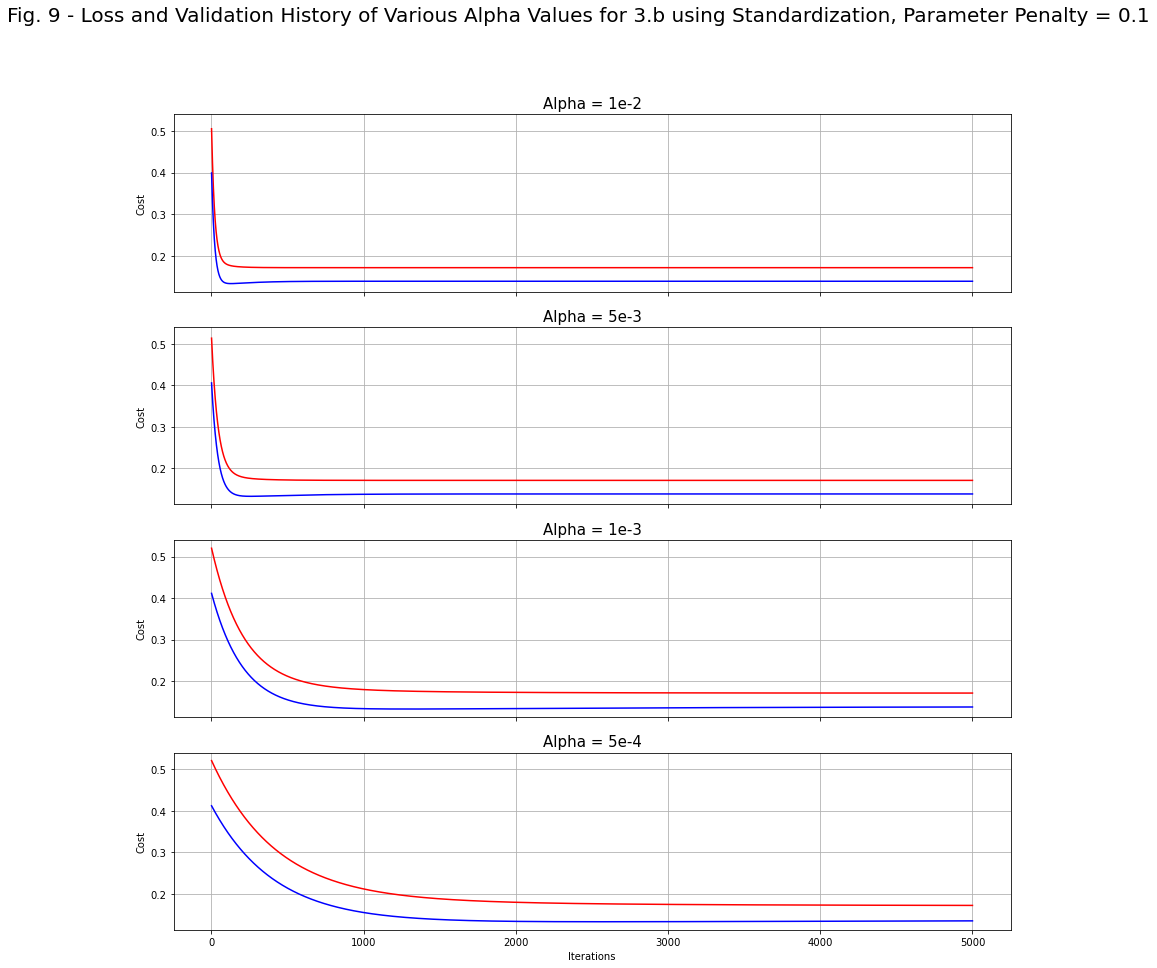

In [224]:
fig9, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig9.suptitle('Fig. 9 - Loss and Validation History of Various Alpha Values for 3.b using Standardization, Parameter Penalty = 0.1', fontsize = 20)

axs[0].plot(range(1, iterations_3b + 1), a_cost_history_3b_st, color = 'red')
axs[0].plot(range(1, iterations_3b + 1), a_val_history_3b_st, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_3b + 1), b_cost_history_3b_st, color = 'red')
axs[1].plot(range(1, iterations_3b + 1), b_val_history_3b_st, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_3b + 1), c_cost_history_3b_st, color = 'red')
axs[2].plot(range(1, iterations_3b + 1), c_val_history_3b_st, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_3b + 1), d_cost_history_3b_st, color = 'red')
axs[3].plot(range(1, iterations_3b + 1), d_val_history_3b_st, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_3b_st[-1], b_val_history_3b_st[-1], c_val_history_3b_st[-1], d_val_history_3b_st[-1])

0.004967023683361105 0.00522450501212056 0.00655558087988723 0.007230572909439709


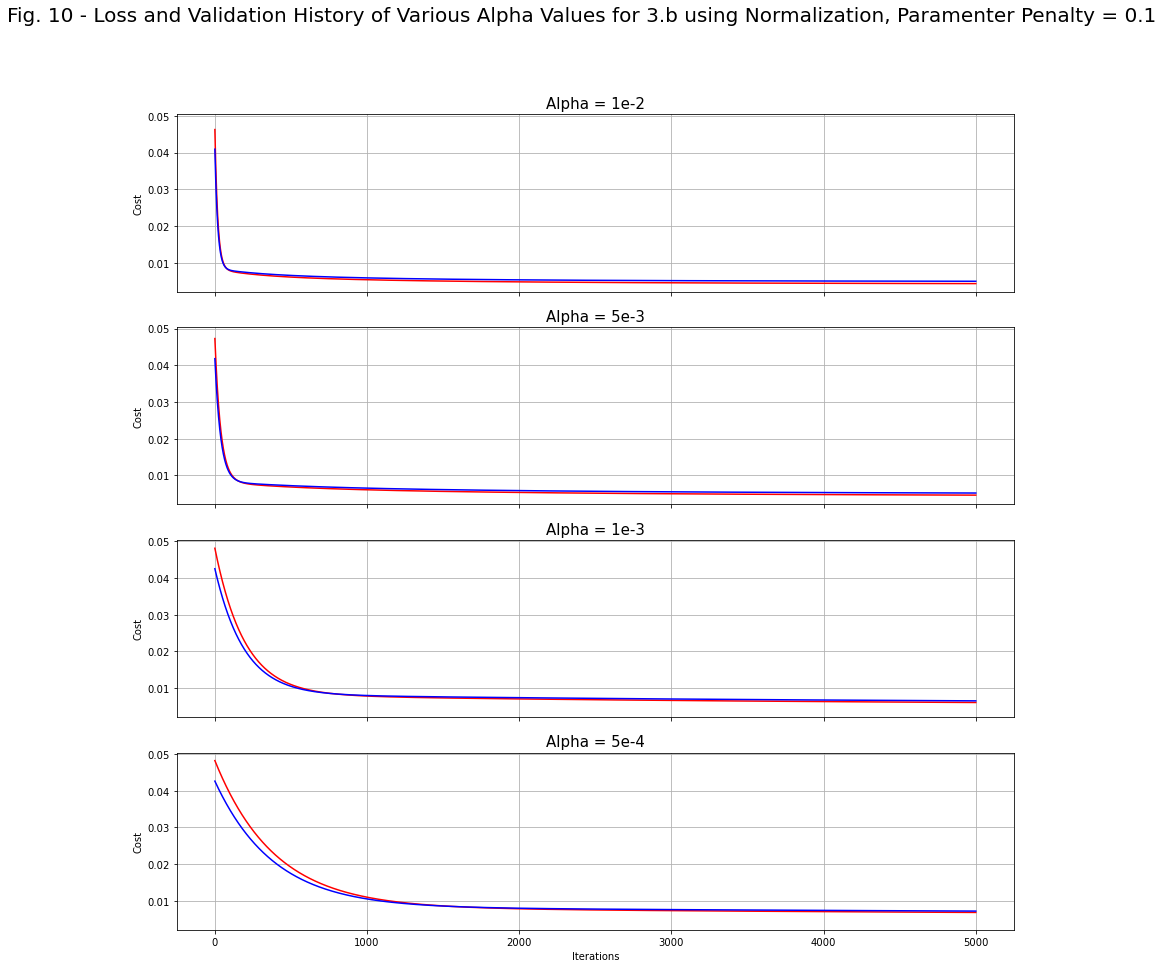

In [225]:
fig10, axs = plt.subplots(4, sharex = True, sharey = True, figsize=(15, 15))
fig10.suptitle('Fig. 10 - Loss and Validation History of Various Alpha Values for 3.b using Normalization, Paramenter Penalty = 0.1', fontsize = 20)

axs[0].plot(range(1, iterations_3b + 1), a_cost_history_3b_mm, color = 'red')
axs[0].plot(range(1, iterations_3b + 1), a_val_history_3b_mm, color = 'blue')
axs[0].set_title('Alpha = 1e-2', fontsize = 15)
axs[0].grid()

axs[1].plot(range(1, iterations_3b + 1), b_cost_history_3b_mm, color = 'red')
axs[1].plot(range(1, iterations_3b + 1), b_val_history_3b_mm, color = 'blue')
axs[1].set_title('Alpha = 5e-3', fontsize = 15)
axs[1].grid()

axs[2].plot(range(1, iterations_3b + 1), c_cost_history_3b_mm, color = 'red')
axs[2].plot(range(1, iterations_3b + 1), c_val_history_3b_mm, color = 'blue')
axs[2].set_title('Alpha = 1e-3', fontsize = 15)
axs[2].grid()

axs[3].plot(range(1, iterations_3b + 1), d_cost_history_3b_mm, color = 'red')
axs[3].plot(range(1, iterations_3b + 1), d_val_history_3b_mm, color = 'blue')
axs[3].set_title('Alpha = 5e-4', fontsize = 15)
axs[3].grid()

for ax in axs.flat:
    ax.set(xlabel = 'Iterations', ylabel = 'Cost')
    ax.label_outer()
    
print(a_val_history_3b_mm[-1], b_val_history_3b_mm[-1], c_val_history_3b_mm[-1], d_val_history_3b_mm[-1])